# Programming Assignment 7: Classy Distributions

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 1.7. Due: complete this PA prior to class on Friday, Oct 20, 2023.*

## Overview of Assignment

This assignment will help you understand more about Object Oriented Programming (OOP) in Python, by exploring how it's used in Scipy. In Python, OOP is done through classes, so you'll learn a bit about how classes can be useful and how to define and instantiate them. You will also learn about subclassing, otherwise known as inheritance, which is the ability for one (child) class to inherit the properties of another (parent) class.

## Reading

There is a thorough overview of classes and OOP in [this chapter](https://mude.citg.tudelft.nl/book-draft/programming/python_topics/classes_solution.html) of the book, along with an optional exercises. Feel free to skip some of the reading, but if you get stuck in this exercise you may want to refer back to it.

## Assignment Criteria

**You will pass this assignment as long as your respository fulfills the following criteria:**  

- This notebook exists and runs without errors
- There is a `data.csv` file in your repository. This is created automatically, but make sure to actually push it!

## Task 1: Playing with subclasses

We'll start by looking at some simple code that shows all the basics: defining a class, instantiating classes and inheritance. You're not required to do anything with it, but feel free to change this and play around!

In [14]:
class Person:
    def __init__(self, name):
        self.name = name
    
    def say_hello(self):
        print(f"Hey, I'm {self.name}, nice to meet you!")

class Employee(Person):
    known_salaries = {"janitor": 50000, "professor": 100, "trader": 100000}
    
    def __init__(self, name, job):
        super().__init__(name)
        self.job = job
    
    def salary(self):
        if self.job.lower() in self.known_salaries:
            print(f"My salary is ${self.known_salaries[self.job.lower()]}!")
        else:
            print("I'm not too sure what my salary is :(")

class Friend(Person):
    def say_hello(self):
        print("Yoo, how are you doing? It's lovely to see you again :)")

def greet_person(person):
    person.say_hello()
    print(f"Hey {person.name}!")

In [15]:
james = Person("James")
james.say_hello()
print()

emma = Employee("Emma", "Janitor")
emma.salary()
emma.say_hello()
print()

philip = Friend("Philip")
greet_person(philip)
print()
greet_person(emma)

Hey, I'm James, nice to meet you!

My salary is $50000!
Hey, I'm Emma, nice to meet you!

Yoo, how are you doing? It's lovely to see you again :)
Hey Philip!

Hey, I'm Emma, nice to meet you!
Hey Emma!


Notice that Emma can say hello, but James doesn't have a salary! The children class *extends* the parent. Confused about the `__init__` or `self`? Go check out the [reading](#Reading)! Also notice that since the `Friend` subclass and `Employee` subclasses both have `say_hello`, we can use either one in the `greet_person` function. You'll use this princople to complete **Task 1.1**.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.1:</b>   
Below there's some code that takes a distribution from Scipy and plots it. You have to change this distribution to be a uniform distribution between 1 and 3. Do not touch the second code cell!
</p>
</div>

In Scipy all distributions are children of the same parent class [`rv_continous`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous). Read the documentation to get a feeling for what this parent class defines. One method it defines is the `.pdf` method, so if we just rely on that, we can freely swap between children classes!

In [16]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

distribution = scipy.stats.uniform(loc = 1) # HINT: change one word in this line of code!

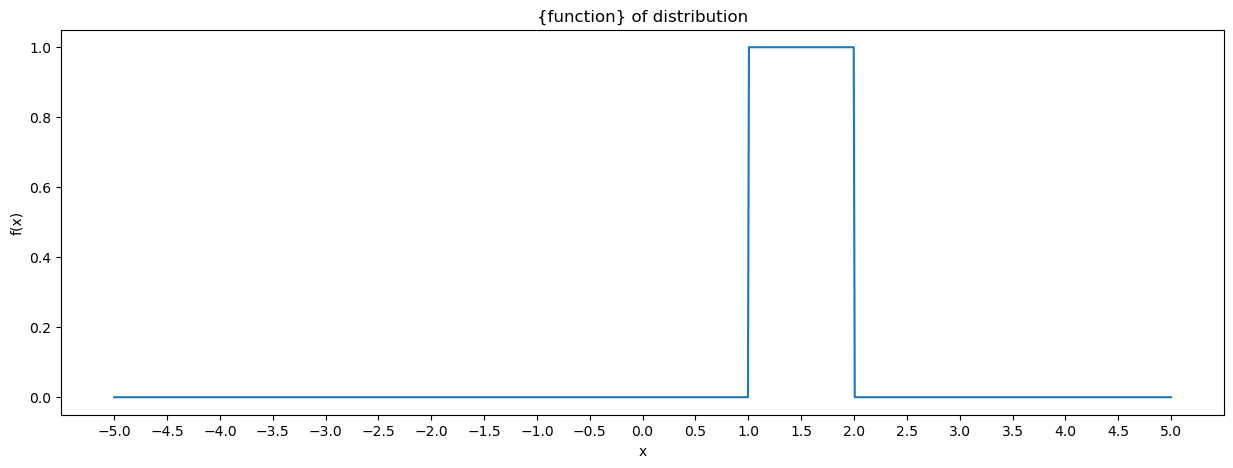

In [17]:
# DO NOT TOUCH ANYTHING IN THIS CODE CELL!

def plot_distribution(distribution, x_bounds = (-5, 5), function="pdf"):
    X_LOW, X_HIGH = x_bounds

    x_axis = np.linspace(X_LOW, X_HIGH, num=1000)
    
    distribution_function = None
    
    if function == "pdf":
        distribution_function = distribution.pdf
    elif function == "cdf":
        distribution_function = distribution.cdf
    else:
        raise KeyError(f"{function} function not supported")
    
    y_axis = np.vectorize(distribution_function)(x_axis)

    plt.figure(figsize=(15, 5))
    plt.plot(x_axis, y_axis)
    plt.title("{function} of distribution")
    plt.xlabel("x")
    plt.xticks(np.linspace(X_LOW, X_HIGH, num=((X_HIGH - X_LOW) * 2 + 1)))
    plt.ylabel("f(x)")
    plt.show()
    
    return x_axis, y_axis

x_axis, y_axis = plot_distribution(distribution)
pd.DataFrame(data = {"x": x_axis, "y": y_axis}).to_csv("data.csv", index=False)

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p><b>Hint:</b> You have completed this successfully if the plot of the PDF above changes to a <em>Uniform</em> distribution: it should look like a rectangle or box, rather than a Bell curve.</p></div>

## Task 2: Making a subclass

Now let's see if we can define our own distribution! We can do this by creating a subclass of `rv_continous`. Reading [the documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html) can be difficult to begin with, but give it a try and see if you can figure out how this would be done.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.1:</b>   
Complete the implementation of the subclass below, so that the pdf is defined as follows:

\begin{equation}
f(x)=
    \begin{cases}
        0.1 & \text{if } 0 < x < 3.6 \\
        2(x-5) &  5 < x < 5.8 \\
        0 & \text{elsewhere}
    \end{cases}
\end{equation}
    
You don't need to worry about the `scale` or `loc` parameters we used earlier.
</p>
</div>

In [18]:
class new_distribution(scipy.stats.rv_continuous):
    """ A new piece-wise distribution defined for Task 2.1 """
    
    def _pdf(self, x):
        """ f(x) = 
            0.1      when 0 < x < 3.6
            2(x - 5) when 5 < x < 5.8
        """
        if 0 < x and x < 3.6:
            return 0.1
        
        if 5 < x and x < 5.8:
            return 2 * (x - 5)
        
        return 0

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p>Run the cell below to visualize the PDF. It should be a jagged, strange looking function. An <code>IntegrationWarning</code> may appear, which you can ignore (the red box).</p></div>

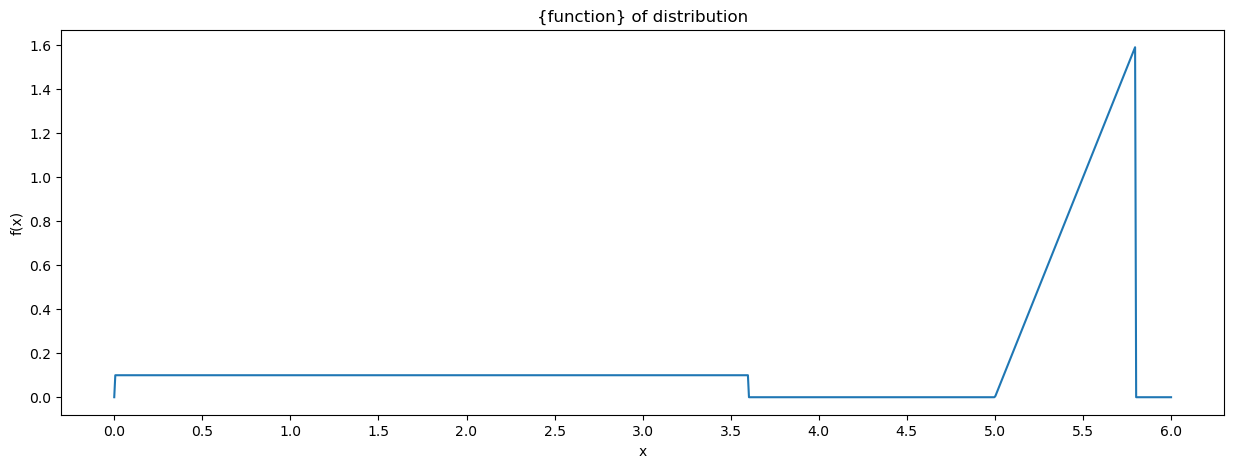

c:\Users\gniko\anaconda3\envs\mude\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1950: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


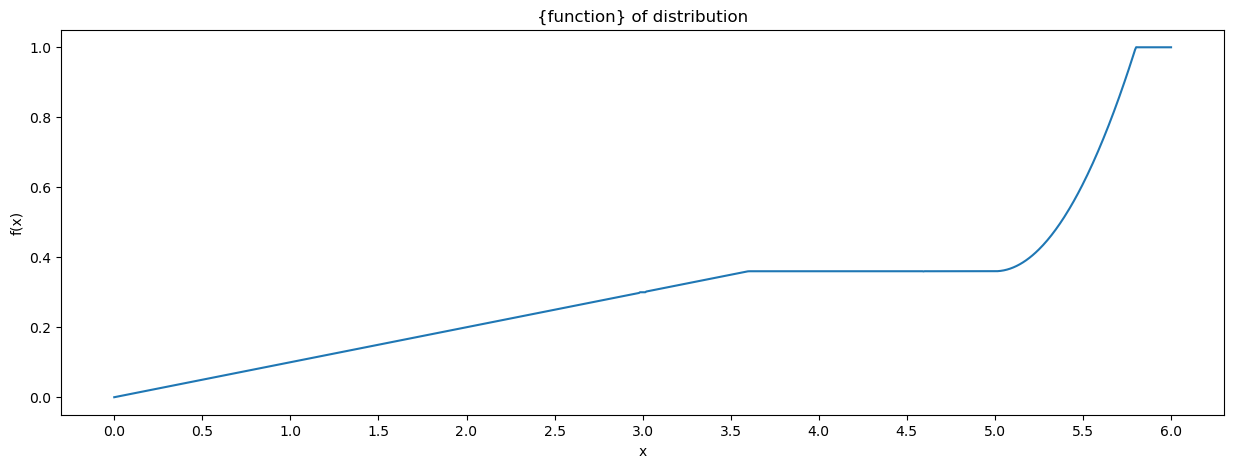

In [19]:
plot_distribution(new_distribution(), x_bounds = (0, 6))
plot_distribution(new_distribution(), x_bounds = (0, 6), function="cdf")
print()


Even the CDF of our custom distribution works! There's a lot of magic that can be accomplished with classes, which you won't need to known for MUDE, but this foundation will help you understand it the day you do!

## Task 3: Another distribution subclass

Let's add another distribution by inheritance. This time, it's the familiar exponential distribution!

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3:</b>   
There are three pieces of code missing below. The first should allow the new class <code>Exponential</code> to inherit from the parent class <code>rv_continous</code>. Then the last two you need to fill in to allow the plot function to compare new class <code>Exponential</code> with the <code>scipy.stats</code> version of exponential (<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html" target="_blank">hint</a>).
</p>
</div>

In [20]:
# Create a distribution as a child class of rv_continuous
from scipy.stats import rv_continuous
class Exponential(rv_continuous):
    "Exponential distribution"
    def __init__(self, lambda_=1):
        super().__init__(lambda_)
        self.lambda_ = lambda_
        
    def _cdf(self, x):
        return 1 - np.exp(-x*self.lambda_)
    
your_distribution = Exponential()

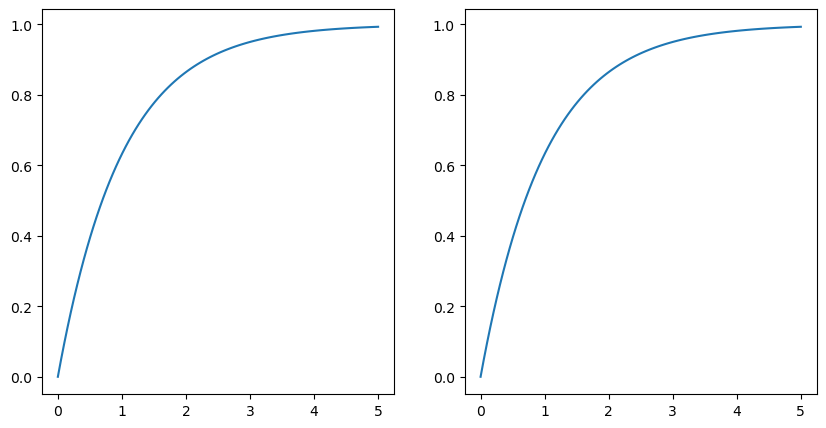

In [21]:
x = np.linspace(0,5,100)
cdf = your_distribution.cdf(x)

# compare with given distribution by scipy 
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(x, cdf)

from scipy.stats import expon
axs[1].plot(x, expon.cdf(x))


<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p>Remember to read the Assignment Criteria at the top of this notebook before pushing!</p></div>

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png"/>
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png"/>
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2023 <a rel="MUDE Team" href="https://studiegids.tudelft.nl/a101_displayCourse.do?course_id=65595">MUDE Teaching Team</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.